## BoomBikes
- We need to build the model to predict the future demand post covid-19 lockdown will be lifted.

- We need to predict the model for demand variation with different features.

- Management will manipulate there startegy accordingly to meet demand & customer expectation 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
#Reading of data
bike=pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#shape of data
bike.shape

(730, 16)

In [5]:
#inspecting columns data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#total no. of columns
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
#describe the data of numerical variables
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#checking null values for the columns
100*(bike.isnull().sum()/len(bike))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
#checking null values for the rows
100*(bike.isnull().sum(axis=1)/len(bike)).sort_values(ascending=False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

In [10]:
bike.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [11]:
#droping the features which are not required for the analysis
df_bike=bike.drop(columns=['instant','dteday','casual','registered'],axis=1)

In [12]:
df_bike.head(15)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [13]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
#changing data types of categorical variables
df_bike['season']=df_bike['season'].astype('category')
df_bike['mnth']=df_bike['mnth'].astype('category')
df_bike['weekday']=df_bike['weekday'].astype('category')
df_bike['weathersit']=df_bike['weathersit'].astype('category')

In [15]:
#mapping the categorical variables
df_bike['season'] = df_bike['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})
df_bike['mnth'] = df_bike['mnth'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
df_bike['weekday'] = df_bike['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
df_bike['weathersit'] = df_bike['weathersit'].map({1:'Clear-Partlycloudy',2:'Mist-Cloudy',3:'LightSnow-lightRain-Thunderstorm',4:'HeavyRain-IcePallets-Thunderstorm'})

In [16]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


# Data Visualization

### Visualizing Numeric Variables
Let's make a pairplot of all the numeric variables, to visualize which variables are most correlated to the target variable 'count'.

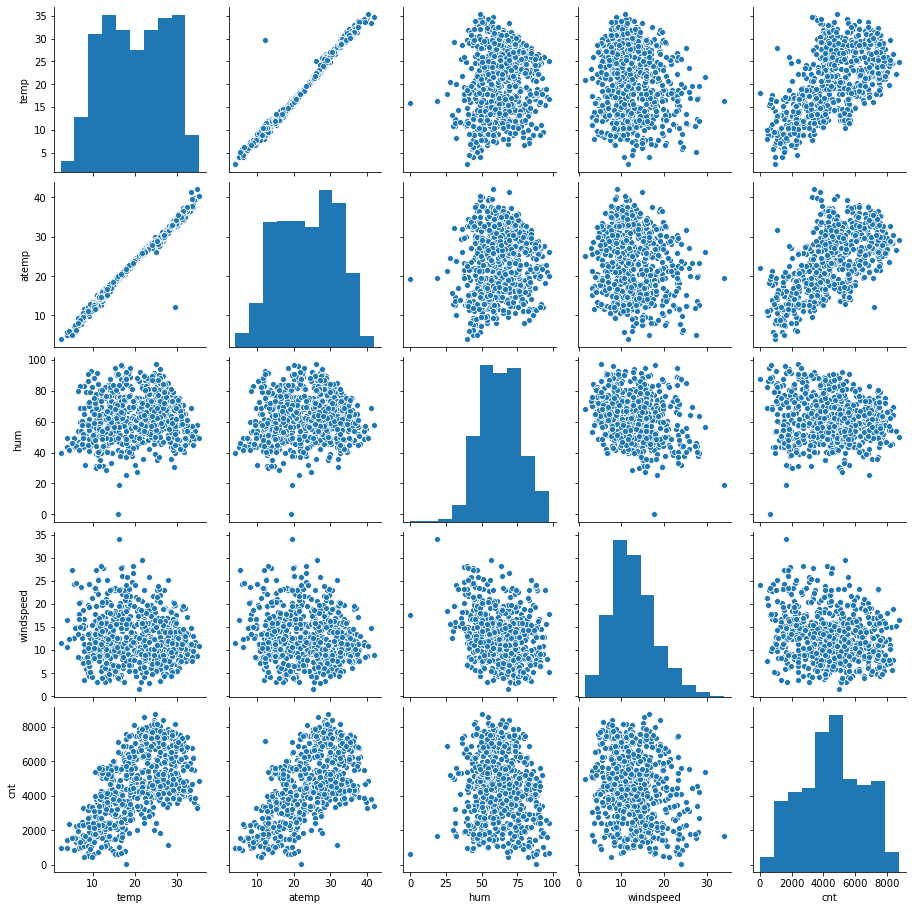

In [17]:
sns.pairplot(df_bike[['temp','atemp','hum','windspeed','cnt']])
plt.show()

#### Inference-
- By analysing all the plots above, we can see that there are some independent variables look positively correlated to the 'count' variable.

- Bike rentals are more correlated to temperature

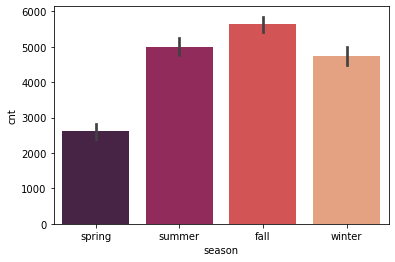

In [18]:
#Barplot to see relation between season and count of bike rentals
sns.barplot('season','cnt',data=df_bike,palette="rocket",)
plt.show()

- Bike Rentals are more during the Fall season and then in summer

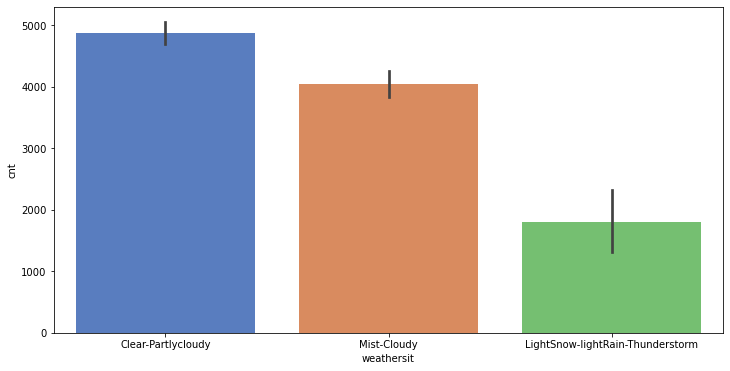

In [19]:
#Relation between weather and count of bike rentals
plt.figure(figsize=[12,6])
sns.barplot('weathersit','cnt',palette="muted",data=df_bike)
plt.show()

- Bike Rentals are more in partly cloudy weather

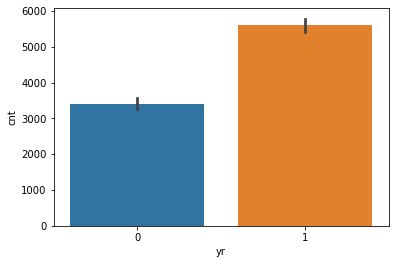

In [20]:
#Relation between Year and count of bike rentals
sns.barplot('yr','cnt',data=df_bike)
plt.show()

- Bike rentals are more in the year 2019 compared to 2018


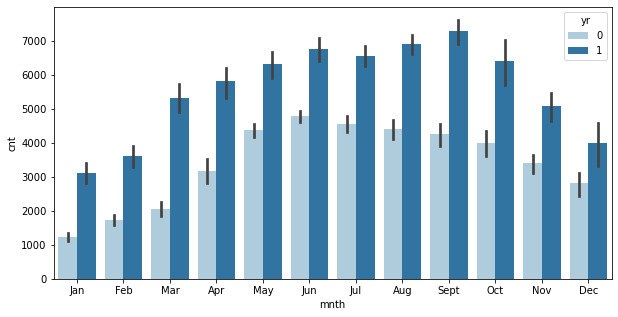

In [21]:
#Relation between month and count with year
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=df_bike,palette='Paired')
plt.show()

- Bike Rentals are more in the year 2019 compared to 2018

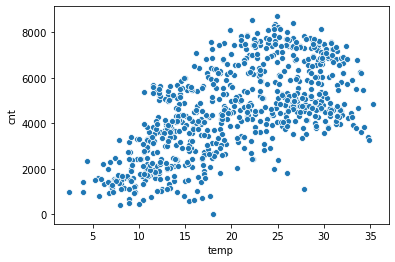

In [22]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='cnt' ,data=df_bike)
plt.show()

- Bike Rentals are observed at higher temperatures


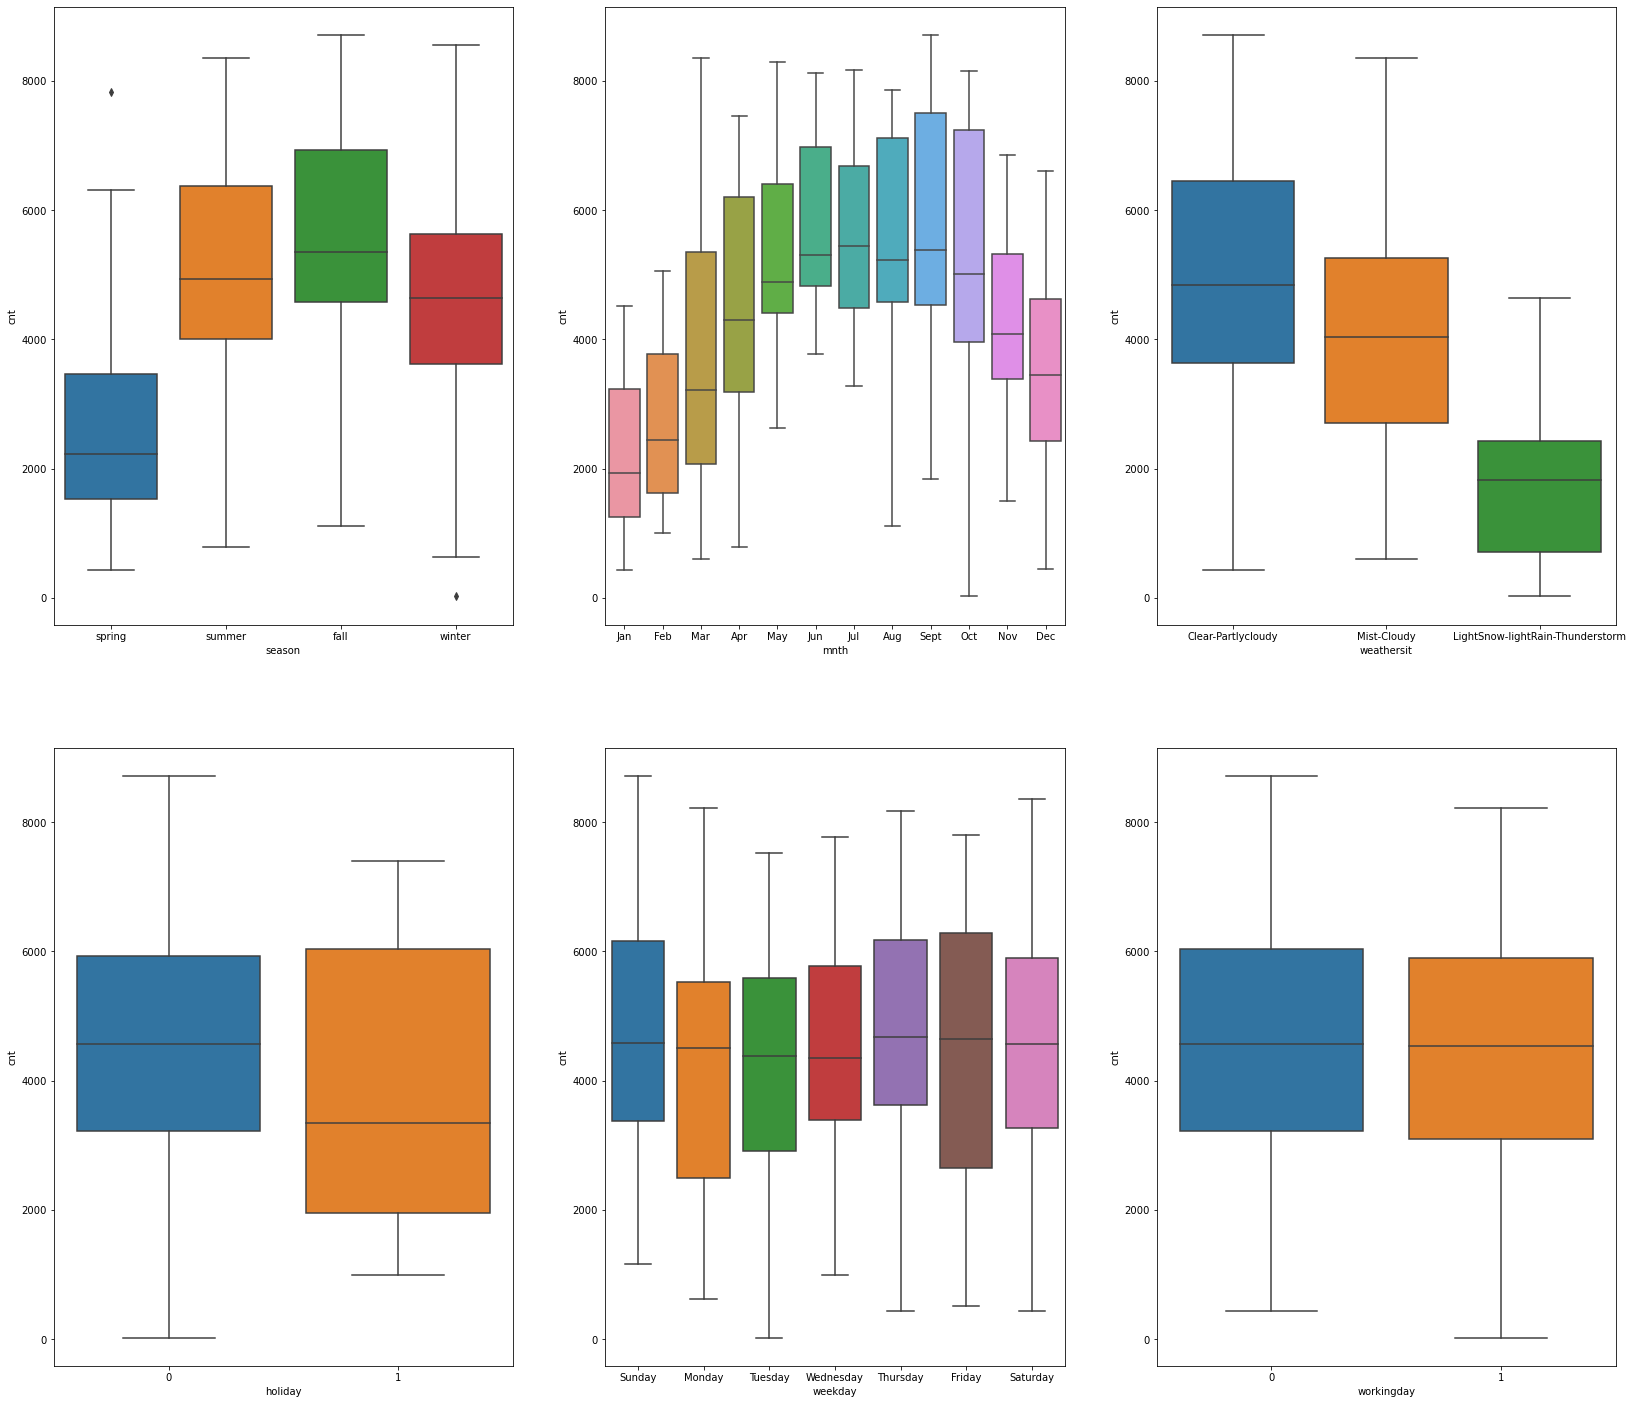

In [23]:
#Box plot for the relation between categorical variables with the dependent variabke
plt.figure(figsize=(28, 25))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)

plt.show()

#### The plots above shows the relationship between categorical variables and a Target variable.

- Bike Rentals are more during the Fall season and then in summer
- Bike Rentals are more in the month march,sep,oct than that of others months.
- Bike Rentals are more in clear or partly cloudy weather
- Bike Rentals are more on Saturday,wednesday and thursday.


In [24]:
# Defining the map function and creating dummies
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the df_bike

df_bike=dummies('season',df_bike)
df_bike= dummies('mnth',df_bike)
df_bike = dummies('weekday',df_bike)
df_bike = dummies('weathersit',df_bike)
df_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist-Cloudy,LightSnow-lightRain-Thunderstorm
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
#checking the variables and dummies
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                730 non-null    int64  
 1   holiday                           730 non-null    int64  
 2   workingday                        730 non-null    int64  
 3   temp                              730 non-null    float64
 4   atemp                             730 non-null    float64
 5   hum                               730 non-null    float64
 6   windspeed                         730 non-null    float64
 7   cnt                               730 non-null    int64  
 8   summer                            730 non-null    uint8  
 9   fall                              730 non-null    uint8  
 10  winter                            730 non-null    uint8  
 11  Feb                               730 non-null    uint8  
 12  Mar     

## Train and Test Split of Dataset

In [26]:
#dividing the dataset in to train and test data
np.random.seed(0)
df_train,df_test=train_test_split(df_bike,train_size=0.7,test_size=0.3,random_state=100)

In [27]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist-Cloudy,LightSnow-lightRain-Thunderstorm
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist-Cloudy,LightSnow-lightRain-Thunderstorm
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,10.899153,13.22605,68.7917,11.791732,2947,0,0,...,0,0,0,1,0,0,0,0,1,0
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,1,0,0,1,0,0,0,0,0
127,0,0,1,21.661653,25.94665,63.1667,5.000712,4333,1,0,...,0,0,0,1,0,0,0,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,0,0,0,1,0,0,1,0


In [29]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Scaling the Variables by using Min-Max scaler

In [30]:
scaler=MinMaxScaler()

In [31]:
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])


In [32]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist-Cloudy,LightSnow-lightRain-Thunderstorm
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist-Cloudy,LightSnow-lightRain-Thunderstorm
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


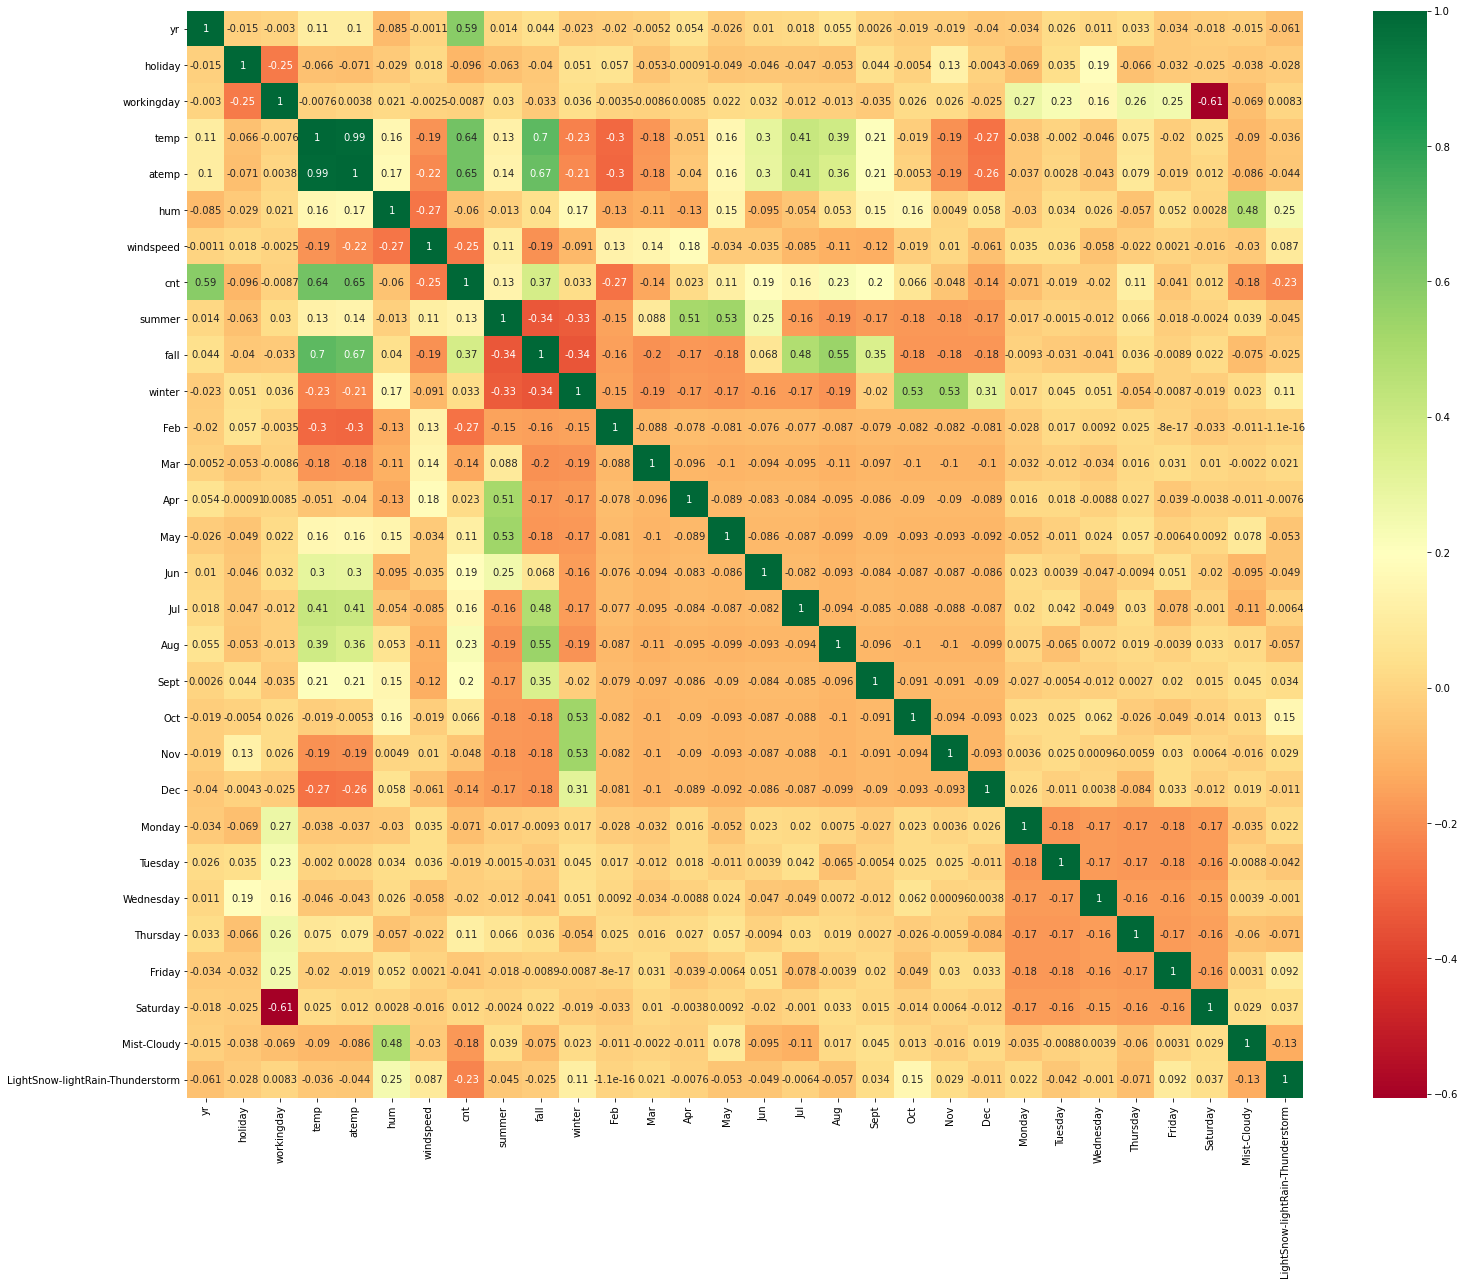

In [34]:
#plotting heatmap for the numerical variables to find out the correlations
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [35]:
#dividing in to x and y
X_train=df_train
y_train=df_train.pop('cnt')

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                510 non-null    int64  
 1   holiday                           510 non-null    int64  
 2   workingday                        510 non-null    int64  
 3   temp                              510 non-null    float64
 4   atemp                             510 non-null    float64
 5   hum                               510 non-null    float64
 6   windspeed                         510 non-null    float64
 7   summer                            510 non-null    uint8  
 8   fall                              510 non-null    uint8  
 9   winter                            510 non-null    uint8  
 10  Feb                               510 non-null    uint8  
 11  Mar                               510 non-null    uint8  
 12  Apr    

# RFE
- Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is an utility from sklearn)

In [37]:
#using the rfe to the train dataset
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Feb', False, 11),
 ('Mar', True, 1),
 ('Apr', False, 2),
 ('May', True, 1),
 ('Jun', False, 3),
 ('Jul', False, 12),
 ('Aug', True, 1),
 ('Sept', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 13),
 ('Dec', False, 14),
 ('Monday', False, 9),
 ('Tuesday', False, 10),
 ('Wednesday', False, 8),
 ('Thursday', False, 6),
 ('Friday', False, 7),
 ('Saturday', False, 15),
 ('Mist-Cloudy', True, 1),
 ('LightSnow-lightRain-Thunderstorm', True, 1)]

In [39]:
#No of features need to consider
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'Mar', 'May', 'Aug', 'Sept', 'Oct', 'Mist-Cloudy',
       'LightSnow-lightRain-Thunderstorm'],
      dtype='object')

In [40]:
#no. of features not required to consider for model building
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Feb', 'Apr', 'Jun', 'Jul', 'Nov', 'Dec',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
      dtype='object')

## Building Model Using Statmodels module

## Model-1

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
X_train_rfe=X_train[col]

In [43]:
X_train_lm=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_lm).fit()
lr1.params

const                               0.237574
yr                                  0.230385
holiday                            -0.089060
temp                                0.484667
hum                                -0.178353
windspeed                          -0.183595
summer                              0.115215
fall                                0.043588
winter                              0.153434
Mar                                 0.033322
May                                 0.030660
Aug                                 0.051139
Sept                                0.120896
Oct                                 0.043662
Mist-Cloudy                        -0.055804
LightSnow-lightRain-Thunderstorm   -0.244542
dtype: float64

In [44]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          2.95e-189
Time:                        19:44:21   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Check the VIF

In [45]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False,ignore_index=True)
vif

,Features,VIF
0,temp,24.64
1,hum,15.55
2,fall,8.80
3,windspeed,3.80
4,summer,3.73
5,winter,3.13
6,Mist-Cloudy,2.15
7,yr,2.04
8,Aug,1.85
9,May,1.68


In [46]:
#Dropping May it has high p-value
X_train_new=X_train_rfe.drop(['May'],axis=1)

In [47]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                510 non-null    int64  
 1   holiday                           510 non-null    int64  
 2   temp                              510 non-null    float64
 3   hum                               510 non-null    float64
 4   windspeed                         510 non-null    float64
 5   summer                            510 non-null    uint8  
 6   fall                              510 non-null    uint8  
 7   winter                            510 non-null    uint8  
 8   Mar                               510 non-null    uint8  
 9   Aug                               510 non-null    uint8  
 10  Sept                              510 non-null    uint8  
 11  Oct                               510 non-null    uint8  
 12  Mist-Cl

## Model-2

In [48]:
#creating and fit the model
X_train_lm1=sm.add_constant(X_train_new)
lr2=sm.OLS(y_train,X_train_lm1).fit()

In [49]:
lr2.params

const                               0.232054
yr                                  0.229702
holiday                            -0.090301
temp                                0.495171
hum                                -0.170179
windspeed                          -0.185711
summer                              0.121713
fall                                0.036642
winter                              0.150362
Mar                                 0.028540
Aug                                 0.050642
Sept                                0.120374
Oct                                 0.042113
Mist-Cloudy                        -0.055934
LightSnow-lightRain-Thunderstorm   -0.246698
dtype: float64

In [50]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          9.02e-190
Time:                        19:44:22   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [51]:
#vif checking
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False,ignore_index=True)
vif

,Features,VIF
0,temp,24.01
1,hum,15.51
2,fall,8.53
3,windspeed,3.73
4,summer,3.51
5,winter,3.07
6,Mist-Cloudy,2.15
7,yr,2.03
8,Aug,1.85
9,Oct,1.64


In [52]:
#Dropping the feature fall as it has high p-value
X_train_new=X_train_new.drop(['fall'],axis=1)

## Model-3

In [53]:
#creating the model and fit the model params
X_train_lm2=sm.add_constant(X_train_new)
lr3=sm.OLS(y_train,X_train_lm2).fit()

In [54]:
lr3.params

const                               0.232420
yr                                  0.228609
holiday                            -0.091995
temp                                0.536385
hum                                -0.178989
windspeed                          -0.189298
summer                              0.104860
winter                              0.139327
Mar                                 0.023825
Aug                                 0.060819
Sept                                0.129567
Oct                                 0.038297
Mist-Cloudy                        -0.054751
LightSnow-lightRain-Thunderstorm   -0.241787
dtype: float64

In [55]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          2.26e-190
Time:                        19:44:22   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [56]:
#check the vif of the variables
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False,ignore_index=True)
vif

,Features,VIF
0,hum,14.75
1,temp,10.01
2,windspeed,3.69
3,winter,2.34
4,Mist-Cloudy,2.14
5,yr,2.02
6,summer,1.83
7,Aug,1.61
8,Oct,1.61
9,Sept,1.34


In [57]:
#dropping the feature Mar it contains high p-value,low vif
X_train_new=X_train_new.drop(['Mar'],axis=1)

## Model-4

In [58]:
#model building
X_train_lm3=sm.add_constant(X_train_new)
lr4=sm.OLS(y_train,X_train_lm3).fit()

In [59]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          6.02e-191
Time:                        19:44:23   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [60]:
#check the vif
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
6,winter,2.27
10,Mist-Cloudy,2.13
0,yr,2.02
5,summer,1.83
9,Oct,1.61
7,Aug,1.60
8,Sept,1.34


In [61]:
#dropping the feature having low p- value and high vif
X_train_new=X_train_new.drop(['hum'],axis=1)

## Model-5

In [62]:
#model building
X_train_lm4=sm.add_constant(X_train_new)
lr5=sm.OLS(y_train,X_train_lm4).fit()

In [63]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          3.21e-187
Time:                        19:44:24   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [64]:
#check for the vif
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False,ignore_index=True)
vif

,Features,VIF
0,temp,5.11
1,windspeed,3.11
2,yr,2.00
3,winter,1.95
4,summer,1.82
5,Oct,1.60
6,Aug,1.59
7,Mist-Cloudy,1.49
8,Sept,1.34
9,LightSnow-lightRain-Thunderstorm,1.09


In [65]:
#dropping the variable having high p-value and low vif
X_train_new=X_train_new.drop(['Oct'],axis=1)

## Model-6

In [66]:
#model building
X_train_lm5=sm.add_constant(X_train_new)
lr6=sm.OLS(y_train,X_train_lm5).fit()

In [67]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.26e-187
Time:                        19:44:24   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [68]:
#check vif
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False,ignore_index=True)
vif

,Features,VIF
0,temp,5.01
1,windspeed,3.10
2,yr,2.00
3,summer,1.81
4,Aug,1.58
5,winter,1.49
6,Mist-Cloudy,1.48
7,Sept,1.31
8,LightSnow-lightRain-Thunderstorm,1.08
9,holiday,1.04


In [69]:
lr6.params

const                               0.131241
yr                                  0.232489
holiday                            -0.097109
temp                                0.517361
windspeed                          -0.149737
summer                              0.099972
winter                              0.138343
Aug                                 0.054165
Sept                                0.116177
Mist-Cloudy                        -0.082534
LightSnow-lightRain-Thunderstorm   -0.282834
dtype: float64

### Final Model Interpretation
Hypothesis Testing:
Hypothesis testing states that:
- H0 : B0 = B1 = B2 = .... = Bn
- H1 : atelast one Bi != 0
- **lr6 model coefficient values :**
- const                               0.131241
- yr                                  0.232489
- holiday                            -0.097109
- temp                                0.517361
- windspeed                          -0.149737
- summer                              0.099972
- winter                              0.138343
- Aug                                 0.054165
- Sept                                0.116177
- Mist-Cloudy                        -0.082534
- LightSnow-lightRain-Thunderstorm   -0.282834

- From the lr6 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS

### F-statistics
- F-statistics is used for testing the overall significance of the model. Higher the F-Statistics value , more significant the model.

F-statistic : 251.3

Prob(F-statistic) : 1.26e-187

The F-Statistics value of 251.3(which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

## Residual Analysis of the train data

In [70]:
#Prediction of the dependent variable by using the model
y_train_pred=lr6.predict(X_train_lm5)

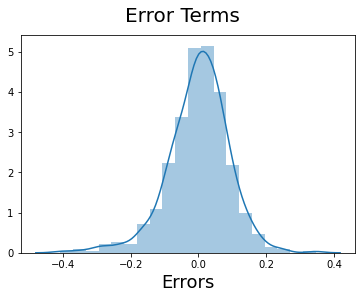

In [71]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

## MAKING PREDICTION USING FINAL MODEL
- We have fitted the model and checked the assumptions, it's time to make predictions using the final model

In [72]:
num_vars=['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [73]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist-Cloudy,LightSnow-lightRain-Thunderstorm
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist-Cloudy,LightSnow-lightRain-Thunderstorm
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing in to X_test and y_test

In [75]:
y_test=df_test.pop('cnt')
X_test=df_test

In [76]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                219 non-null    int64  
 1   holiday                           219 non-null    int64  
 2   workingday                        219 non-null    int64  
 3   temp                              219 non-null    float64
 4   atemp                             219 non-null    float64
 5   hum                               219 non-null    float64
 6   windspeed                         219 non-null    float64
 7   summer                            219 non-null    uint8  
 8   fall                              219 non-null    uint8  
 9   winter                            219 non-null    uint8  
 10  Feb                               219 non-null    uint8  
 11  Mar                               219 non-null    uint8  
 12  Apr    

In [77]:
col1=X_train_new.columns
X_test=X_test[col1]
X_test_lm5=sm.add_constant(X_test)
X_test_lm5.head()

,const,yr,holiday,temp,windspeed,summer,winter,Aug,Sept,Mist-Cloudy,LightSnow-lightRain-Thunderstorm
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,1,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0,0


## Model Evaluations

In [78]:
y_pred=lr6.predict(X_test_lm5)

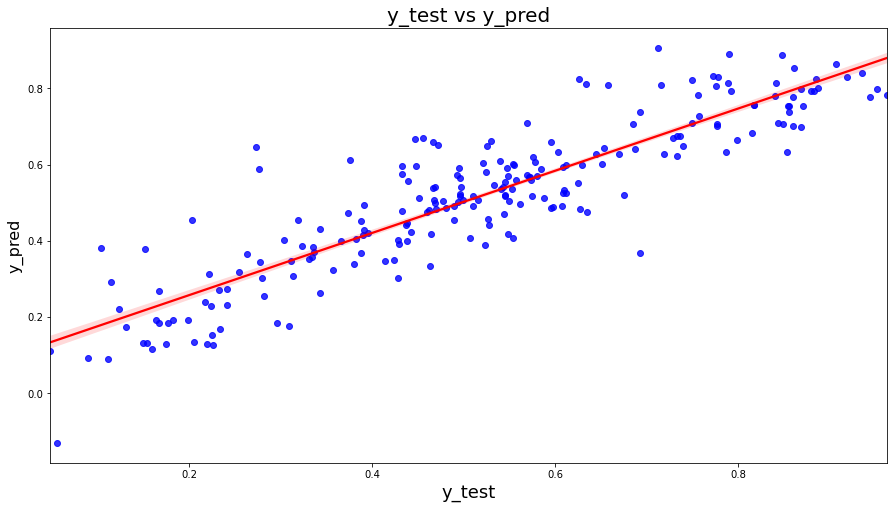

In [79]:
#Plotting y_test and y_pred to understand the spread
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)          
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

## R^2 Value for TEST

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7931434526028905

### Adjusted R^2 Value for TEST
- Adjusted R^2 = 1- [(1-R^2)*(n-1)/(n-p-1)]

where

n : Number of rows

p : No of predictors/ variables

In [81]:
r2=0.7931434526028905
n=X_test.shape[0]
p=X_test.shape[1]
adj_r2_score=1-((1-r2)*(n-1)/(n-p-1))
print(adj_r2_score)

0.7831984262857219


### Final Result Comparison
- R^2(Train Dataset) : 0.834

- Adjusted R^2(Train dataset) : 0.831

- R^2(Test Dataset) : 0.793

- Adjusted R^2(Test dataset) : 0.783

**This seems to be a very good model.**

### FINAL REPORT


- The equation of best fitted model:
- **cnt =0.131241  + (yr* 0.232489 ) + (temp* 0.517361) - (windspeed* 0.149737) + (summer* 0.099972) + (winter* 0.138343) - (holiday* 0.097109)+ (Aug* 0.054165 ) + (Sept* 0.116177 ) - (Mist-Cloudy* 0.082534 ) - (LightSnow-lightRain-Thunderstorm*   0.282834)**




- As per our final model, the top three predictor variables that influences the bike bookings are

- temp : A coefficient value of ‘0.517361’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.517361 units.

-  LightSnow-lightRain-Thunderstorm: A coefficient value of ‘-0.282834’ indicated that, w.r.t ,LightSnow-lightRain-Thunderstorm a unit increase in LightSnow-lightRain-Thunderstorm variable, decreases the bike hire numbers by 0.282834 units.

- yr : A coefficient value of ‘0.232489’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.232489 units

#### The next best features which can be considered are

- windspeed : A coefficient value of ‘-0.149737’ indicated that, w.r.t Windspeed, a unit increase in Windspeed variable, decreases the bike hire numbers by 0.149737 units.

- winter : A coefficient value of ‘0.138343’ indicated that a unit increase in winter variable increases the bike hire numbers by 0.138343 units.

- Aug : A coefficient value of ‘0.054165’ indicated that a unit increase in Aug variable increases the bike hire numbers by 0.054165 units.

- summer : A coefficient value of ‘0.099972’ indicated that a unit increase in summer variable increases the bike hire numbers by 0.099972 units.

- Mist-Cloudy: A coefficient value of ‘-0.082534’ indicated that a unit increase in Mist-Cloudy variable decreases the bike hire numbers by 0.082534 units.

- Sept:A coefficient value of ‘0.116177’ indicated that a unit increase in Sept variable increases the bike hire numbers by 0.116177 units.

- holiday:A coefficient value of ‘-0.097109’ indicated that a unit increase in holiday variable decreases the bike hire numbers by 0.097109 units